# Exploring the data

## Step 1: Import Libraries
We'll use the following libraries in this notebook:

In [55]:
import pandas as pd
import seaborn as sns
import seaborn.matrix as smatrix
%matplotlib inline

## Step 2: Find highest traffic stations
First, we'll read in our cleaned dataset 

In [56]:
df = pd.read_pickle('cleaned_turnstile_data2.pkl')
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,...,station_id,entries_diff,exit_diff,first_row_group,entires_diff,entries_outlier,exit_outlier,all_traffic,week,hour
114964,PTH07,R550,00-02-01,CITY / BUS,1,PTH,03/25/2017,07:10:33,REGULAR,22298,...,CITY / BUS1PTH,0.0,0.0,False,NaN,False,False,0.0,12,7
114965,PTH07,R550,00-02-01,CITY / BUS,1,PTH,03/25/2017,11:22:33,REGULAR,22298,...,CITY / BUS1PTH,0.0,0.0,False,NaN,False,False,0.0,12,11
114966,PTH07,R550,00-02-01,CITY / BUS,1,PTH,03/25/2017,15:34:33,REGULAR,22298,...,CITY / BUS1PTH,0.0,3.0,False,NaN,False,False,3.0,12,15
114967,PTH07,R550,00-02-01,CITY / BUS,1,PTH,03/25/2017,19:46:33,REGULAR,22298,...,CITY / BUS1PTH,0.0,1.0,False,NaN,False,False,1.0,12,19
114968,PTH07,R550,00-02-01,CITY / BUS,1,PTH,03/25/2017,23:58:33,REGULAR,22298,...,CITY / BUS1PTH,0.0,0.0,False,NaN,False,False,0.0,12,23


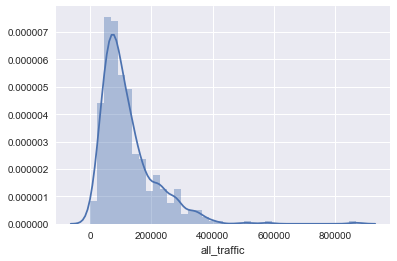

In [57]:
# Find weekly average entry/exits per station
stations_week = df.groupby(['station_id', 'week']).sum()
stations_week.reset_index(inplace=True)

weekly_avg = stations_week.groupby('station_id')['all_traffic'].mean()
weekly_avg.sort_values(ascending=False, inplace=True)

sns.distplot(weekly_avg, hist=True, kde=True);

In [58]:
weekly_avg.head()

station_id
34 ST-PENN STAACEIND       867225.533333
GRD CNTRL-42 ST4567SIRT    576730.666667
FLUSHING-MAIN7IRT          503940.933333
47-50 STS ROCKBDFMIND      411912.066667
33 ST6IRT                  396989.066667
Name: all_traffic, dtype: float64

Find the value at the bottom of the top X quantile in most trafficked stations

In [59]:
print(weekly_avg.describe())
top_Q = weekly_avg.quantile(.90)
top_Q

count       516.000000
mean     123500.020995
std       89476.300998
min         116.300000
25%       64042.933333
50%       95959.133333
75%      156802.850000
max      867225.533333
Name: all_traffic, dtype: float64


240457.6

In [60]:
def find_x_most_dense_stations(series, quantile):
    largest_stations = []
    for index, value in series.iteritems():
        if value > quantile:
            largest_stations.append(index)
    return set(largest_stations)

In [61]:
most_frequent = find_x_most_dense_stations(weekly_avg, top_Q)

In [72]:
len(most_frequent)
most_frequent

{'125 ST456IRT',
 '125 STACBDIND',
 '14 ST123FLMIRT',
 '14 STFLM123IND',
 '161/YANKEE STADBD4IND',
 '23 ST6IRT',
 '28 ST6IRT',
 '33 ST6IRT',
 '34 ST-HERALD SQBDFMNQRIND',
 '34 ST-HERALD SQBDFMNQRWIND',
 '34 ST-PENN STA123ACEIRT',
 '34 ST-PENN STA123IRT',
 '34 ST-PENN STAACEIND',
 '42 ST-BRYANT PKBDFM7IND',
 '42 ST-PORT AUTHACENQRS1237IND',
 '42 ST-PORT AUTHACENQRS1237WIND',
 '47-50 STS ROCKBDFMIND',
 '50 ST1IRT',
 '51 ST6IRT',
 '59 ST COLUMBUSABCD1IND',
 '59 ST456NQRWIRT',
 '66 ST-LINCOLN1IRT',
 '72 ST123IRT',
 '86 ST1IRT',
 '86 ST456IRT',
 '96 ST123IRT',
 'ATL AV-BARCLAY2345BDNQRIRT',
 'BOROUGH HALL2345RIRT',
 'BOWLING GREEN45IRT',
 'CHAMBERS STACE23IND',
 'CHURCH AVBQBMT',
 'CONEY IS-STILLWDFNQBMT',
 'CROWN HTS-UTICA34IRT',
 'DELANCEY/ESSEXFJMZIND',
 'FLATBUSH AV-B.C25IRT',
 'FLUSHING-MAIN7IRT',
 'FOREST HILLS 71EFMRIND',
 'FULTON ST2345ACJZIND',
 'FULTON ST2345ACJZIRT',
 'GRD CNTRL-42 ST4567SIRT',
 'GROVE STREET1PTH',
 'JAMAICA 179 STFIND',
 'JAY ST-METROTECACFIND',
 'JKSN HT-ROOSVL

### Step 3: Find most active times at high traffic stations

Find the times when the frequented stations are most active

In [63]:
df['highest_freq'] = [x in most_frequent for x in df['station_id']]
highest_freq_stations = df[df['highest_freq']]
highest_freq_stations.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,...,entries_diff,exit_diff,first_row_group,entires_diff,entries_outlier,exit_outlier,all_traffic,week,hour,highest_freq
75097,N305A,R016,00-03-04,LEXINGTON AV/53,EM6,IND,03/25/2017,04:00:00,REGULAR,10500187,...,46.0,30.0,False,NaN,False,False,76.0,12,4,True
75098,N305A,R016,00-03-04,LEXINGTON AV/53,EM6,IND,03/25/2017,08:00:00,REGULAR,10500204,...,17.0,56.0,False,NaN,False,False,73.0,12,8,True
75099,N305A,R016,00-03-04,LEXINGTON AV/53,EM6,IND,03/25/2017,12:00:00,REGULAR,10500271,...,67.0,180.0,False,NaN,False,False,247.0,12,12,True
75100,N305A,R016,00-03-04,LEXINGTON AV/53,EM6,IND,03/25/2017,16:00:00,REGULAR,10500435,...,164.0,210.0,False,NaN,False,False,374.0,12,16,True
75101,N305A,R016,00-03-04,LEXINGTON AV/53,EM6,IND,03/25/2017,20:00:00,REGULAR,10500606,...,171.0,204.0,False,NaN,False,False,375.0,12,20,True


In [66]:
# Aggregate all entry/exit counts for most frequent stations and look at distribution across days of week and hour of day
timing = highest_freq_stations.groupby(['weekday','hour'])['all_traffic'].sum().reset_index()
timing.head()

,weekday,hour,all_traffic
0,Friday,0,4916269.0
1,Friday,1,1784337.0
2,Friday,2,355603.0
3,Friday,3,38883.0
4,Friday,4,1079249.0
